In [97]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Weather 2 dataset

### Importing dataset

In [98]:
weather2 = pd.read_csv('Weather_New_2.csv')
weather2.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [99]:
weather2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      35 non-null     object
 1   temperature  35 non-null     object
 2   humidity     35 non-null     object
 3   windy        35 non-null     bool  
 4   play         35 non-null     object
dtypes: bool(1), object(4)
memory usage: 1.3+ KB


### Check for null values

In [100]:
weather2.isnull().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

### Converting data to numeric values

In [101]:
from sklearn.preprocessing import LabelEncoder as le

numeric_weather2 = pd.DataFrame()
numeric_weather2['outlook'] = le().fit_transform(weather2['outlook'])
numeric_weather2['temperature'] = le().fit_transform(weather2['temperature'])
numeric_weather2['humidity'] = le().fit_transform(weather2['humidity'])
numeric_weather2['windy'] = le().fit_transform(weather2['windy'])
numeric_weather2['play'] = le().fit_transform(weather2['play'])
numeric_weather2.head()


,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


### Correlation matrix

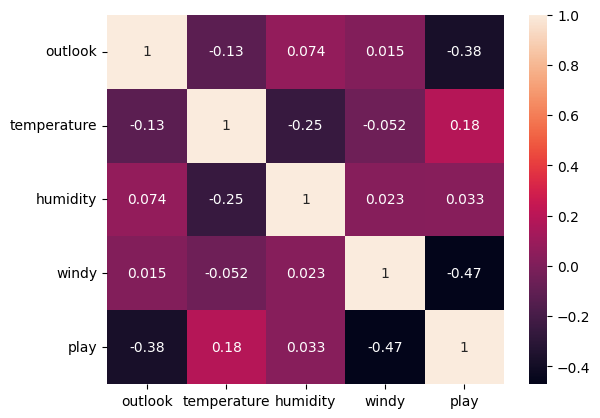

In [102]:
sb.heatmap(numeric_weather2.corr(), annot=True)
plt.show()

### Splitting train and test data

In [103]:
from sklearn.model_selection import train_test_split

x = numeric_weather2.drop('play', axis=1)
y = numeric_weather2.play

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 4)
(7, 4)
(28,)
(7,)


### Classifying using decision tree

Actual class: [1 1 1 0 0 1 0]
predictions: [1 1 1 0 1 1 0]
Confusion matrix:


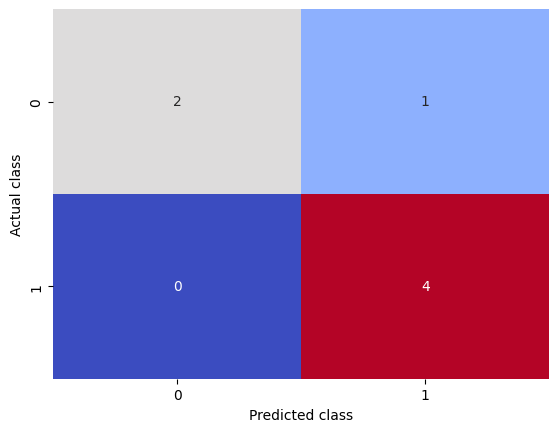

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


NB_clf = GaussianNB()
NB_clf.fit(x_train, y_train)
pred = NB_clf.predict(x_test)
print("Actual class:", y_test.values)
print("predictions:", pred)
print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_test, pred)
sb.heatmap(confusion_matrix, cmap='coolwarm', annot=True, cbar=False).set(
    xlabel='Predicted class', ylabel='Actual class')
plt.show()

### Calculations

In [105]:
tp = confusion_matrix[1,1]
tn = confusion_matrix[0,0]
fp = confusion_matrix[0,1]
fn = confusion_matrix[1,0]
p = tp + fn
n = tn + fp
recall = tp/p
accuracy = (tp+tn)/(p+n)
error = 1 - accuracy
precision = tp/(tp+fp)
f1_score = (2*precision*recall)/(precision+recall)
print("True positive: " , tp)
print("False positive: " , fp)
print("True negative: " , tn)
print("False negative: " , fn)
print("Positive: " , p)
print("Negative: " , n)
print("Recall: " , recall)
print("Accuracy: " , accuracy)
print("Error: " , error)
print("Precision: " , precision)
print("F1_Score: " , f1_score)


True positive:  4
False positive:  1
True negative:  2
False negative:  0
Positive:  4
Negative:  3
Recall:  1.0
Accuracy:  0.8571428571428571
Error:  0.1428571428571429
Precision:  0.8
F1_Score:  0.888888888888889


### ROC graph

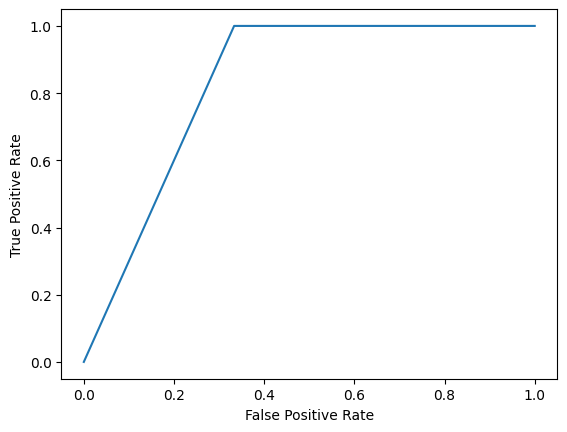

In [106]:
x = [0,tp/p,1]
y = [0,fp/n,1]
plt.plot(y, x)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
